In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load in csv file

In [2]:
names = ['name', 'MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)', 'MDVP:Jitter(%)' 'MDVP:Jitter(Abs)', 'MDVP:RAP','MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3' 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'status']

df = pd.read_csv('data.csv')
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [3]:
%matplotlib inline

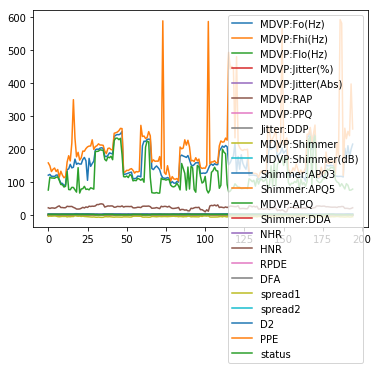

In [4]:
df.plot()

## Histograms for each of the variables

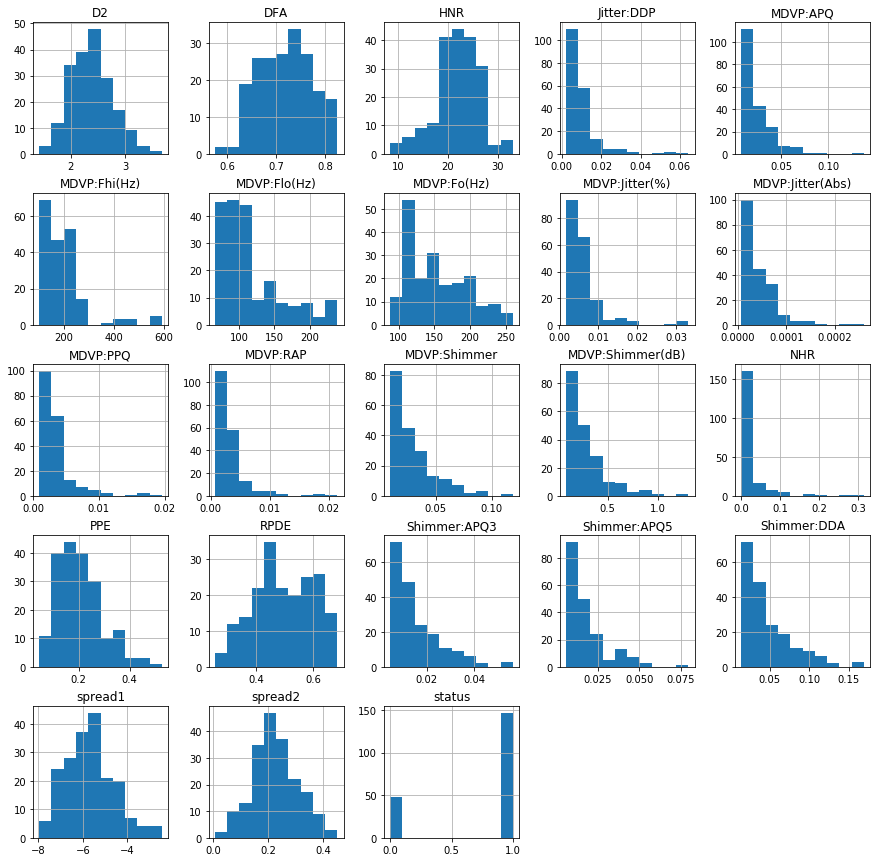

In [5]:
pd.DataFrame.hist(df, figsize = [15,15]);

## Separate voice measurements from patient status

In [6]:
X = df.drop('status' , 1).values # drop target variable
y = df['status'].values

In [7]:
y.shape

(195,)

## Divide data into training and test sets
Also scale the voice recording data and create a new variable

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
X = X[:,1:]
Xs = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y,random_state=1)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, y, test_size=0.20, stratify=y,random_state=1)

C:\Users\longs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [9]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (156, 22)
Y_train shape:  (156,)
X_test shape:  (39, 22)
Y_test shape:  (39,)


In [10]:
print("Xs_train shape: ", Xs_train.shape)
print("Ys_train shape: ", ys_train.shape)
print("Xs_test shape: ", Xs_test.shape)
print("Ys_test shape: ", ys_test.shape)

Xs_train shape:  (156, 22)
Ys_train shape:  (156,)
Xs_test shape:  (39, 22)
Ys_test shape:  (39,)


## Histogram of the unscaled voice measurements

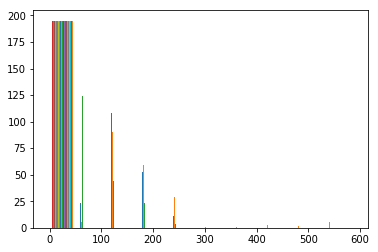

In [11]:
plt.hist(X);

## Histogram of the scaled voice measurements

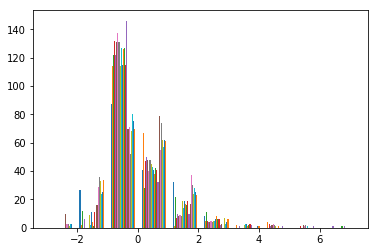

In [12]:
plt.hist(Xs);

## k-nearest neighbor algorithm for unscaled data

In [13]:
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 6)
knn_model_1 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

k-NN accuracy for test set: 0.846154
             precision    recall  f1-score   support

          0       0.75      0.60      0.67        10
          1       0.87      0.93      0.90        29

avg / total       0.84      0.85      0.84        39



## k-nearest neighbor algorithm for scaled data

In [14]:
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 6)
knn_model_2 = knn.fit(Xs_train, ys_train)
print('k-NN accuracy for test set: %f' % knn_model_2.score(Xs_test, ys_test))
ys_true, ys_pred = ys_test, knn_model_2.predict(Xs_test)
print(classification_report(ys_true, ys_pred))

k-NN accuracy for test set: 0.897436
             precision    recall  f1-score   support

          0       0.88      0.70      0.78        10
          1       0.90      0.97      0.93        29

avg / total       0.90      0.90      0.89        39



In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

## Cross Validation of Unscaled Data
Training set accuracy = 80%, 
Test set accuracy = 85%, 
with a k value of 6

In [16]:
k = [4,5,6,7,8,9,10]
parameters = {'n_neighbors':k}

knn = neighbors.KNeighborsClassifier()
gs = GridSearchCV(knn, parameters, scoring='accuracy', cv=10)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Best Validation accuracy: %.2f' % clf.score(X_test, y_test))

0.8012820512820513
{'n_neighbors': 6}
Best Validation accuracy: 0.85


## Cross Validation of Scaled Data
Test set accuracy = 92.3%,
Validation set accuracy = 87%,
With a k value of 7

In [17]:
k = [4,5,6,7,8,9,10]
parameters = {'n_neighbors':k}

knn = neighbors.KNeighborsClassifier()
gs = GridSearchCV(knn, parameters, scoring='accuracy', cv=10)

clf = gs.fit(Xs_train, ys_train)
print(clf.best_score_)
print(clf.best_params_)
print('Best Validation accuracy: %.2f' % clf.score(Xs_test, ys_test))


0.9230769230769231
{'n_neighbors': 7}
Best Validation accuracy: 0.87


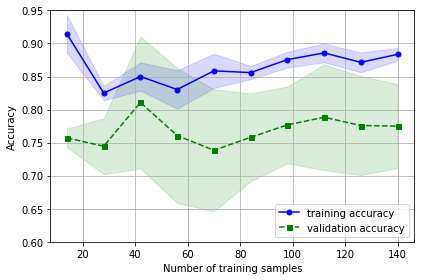

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=knn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 0.95])
plt.tight_layout()
plt.show()

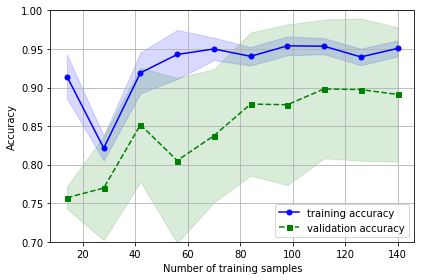

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=knn,
                               X=Xs_train,
                               y=ys_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 1.0])
plt.tight_layout()
plt.show()

## Valiation curve for unscaled data

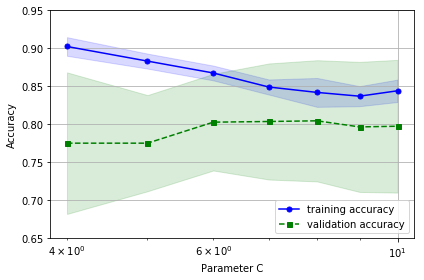

In [20]:
from sklearn.model_selection import validation_curve


param_range = [4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(
                estimator=knn, 
                X=X_train, 
                y=y_train, 
                param_name='n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.65, 0.95])
plt.tight_layout()
plt.show()

## Validation curve for scaled data

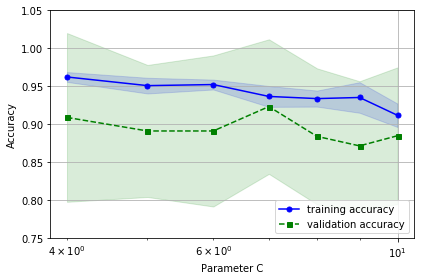

In [21]:
from sklearn.model_selection import validation_curve


param_range = [4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(
                estimator=knn, 
                X=Xs_train, 
                y=ys_train, 
                param_name='n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.75, 1.05])
plt.tight_layout()
plt.show()